In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

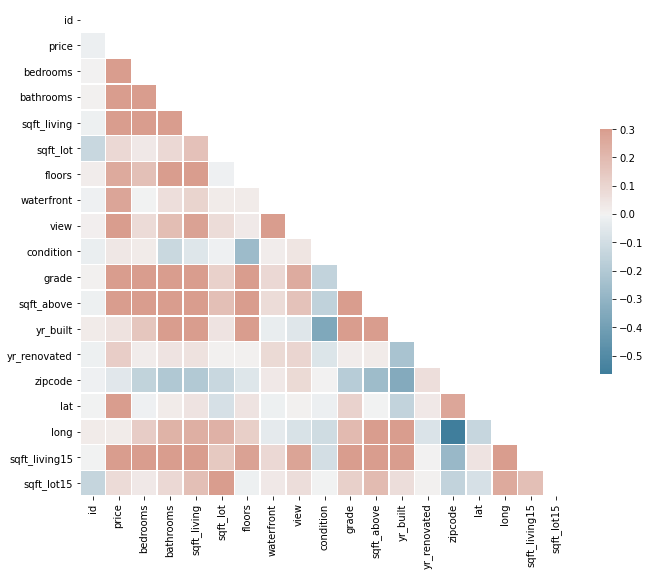

In [132]:
df= pd.read_csv('data/kc_house_data.csv')
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [134]:
df=df[['price','sqft_living','bedrooms','bathrooms','floors','grade','condition','yr_built','yr_renovated','waterfront']]
df

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,yr_built,yr_renovated,waterfront
0,221900.0,1180,3,1.00,1.0,7,3,1955,0.0,NaN
1,538000.0,2570,3,2.25,2.0,7,3,1951,1991.0,0.0
2,180000.0,770,2,1.00,1.0,6,3,1933,NaN,0.0
3,604000.0,1960,4,3.00,1.0,7,5,1965,0.0,0.0
4,510000.0,1680,3,2.00,1.0,8,3,1987,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1530,3,2.50,3.0,8,3,2009,0.0,0.0
21593,400000.0,2310,4,2.50,2.0,8,3,2014,0.0,0.0
21594,402101.0,1020,2,0.75,2.0,7,3,2009,0.0,0.0
21595,400000.0,1600,3,2.50,2.0,8,3,2004,0.0,NaN


In [135]:
df.isnull().sum()

price              0
sqft_living        0
bedrooms           0
bathrooms          0
floors             0
grade              0
condition          0
yr_built           0
yr_renovated    3842
waterfront      2376
dtype: int64

In [136]:
df['waterfront'] = df['waterfront'].fillna(0)

In [137]:
df.isnull().sum()
df['yr_renovated'] = df['yr_renovated'].fillna(0)
df.isnull().sum()

price           0
sqft_living     0
bedrooms        0
bathrooms       0
floors          0
grade           0
condition       0
yr_built        0
yr_renovated    0
waterfront      0
dtype: int64

In [138]:
df.rename(columns={'yr_renovated': 'renovated'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   sqft_living  21597 non-null  int64  
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   floors       21597 non-null  float64
 5   grade        21597 non-null  int64  
 6   condition    21597 non-null  int64  
 7   yr_built     21597 non-null  int64  
 8   renovated    21597 non-null  float64
 9   waterfront   21597 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.6 MB


In [139]:
df['age'] = 2015 - df.yr_built
df = df.drop(columns=['yr_built'], axis=1)

In [140]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,age
0,221900.0,1180,3,1.00,1.0,7,3,0.0,0.0,60
1,538000.0,2570,3,2.25,2.0,7,3,1991.0,0.0,64
2,180000.0,770,2,1.00,1.0,6,3,0.0,0.0,82
3,604000.0,1960,4,3.00,1.0,7,5,0.0,0.0,50
4,510000.0,1680,3,2.00,1.0,8,3,0.0,0.0,28


In [141]:
renovated = df.renovated.values
age = df.age.values
values = np.where(renovated <= 10, 1, 0)
df['renovated'] = np.where(age <= 5, 1, values)

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,age,old_houses,new_houses
price,1.000000,0.701917,0.308787,0.525906,0.256804,0.667951,0.036056,-0.117543,0.264306,-0.053953,-0.128119,0.127512
sqft_living,0.701917,1.000000,0.578212,0.755758,0.353953,0.762779,-0.059445,-0.050829,0.104637,-0.318152,-0.267367,0.263504
bedrooms,0.308787,0.578212,1.000000,0.514508,0.177944,0.356563,0.026496,-0.017635,-0.002127,-0.155670,-0.090147,0.089761
bathrooms,0.525906,0.755758,0.514508,1.000000,0.502582,0.665838,-0.126479,-0.046742,0.063629,-0.507173,-0.438120,0.432903
floors,0.256804,0.353953,0.177944,0.502582,1.000000,0.458794,-0.264075,-0.003713,0.020797,-0.489193,-0.600415,0.594597
grade,0.667951,0.762779,0.356563,0.665838,0.458794,1.000000,-0.146896,-0.015259,0.082818,-0.447865,-0.361087,0.354740
condition,0.036056,-0.059445,0.026496,-0.126479,-0.264075,-0.146896,1.000000,0.055383,0.016648,0.361592,0.365741,-0.360910
renovated,-0.117543,-0.050829,-0.017635,-0.046742,-0.003713,-0.015259,0.055383,1.000000,-0.074267,-0.202837,-0.112708,0.110413
waterfront,0.264306,0.104637,-0.002127,0.063629,0.020797,0.082818,0.016648,-0.074267,1.000000,0.024487,0.021926,-0.020664
age,-0.053953,-0.318152,-0.155670,-0.507173,-0.489193,-0.447865,0.361592,-0.202837,0.024487,1.000000,0.703538,-0.695668


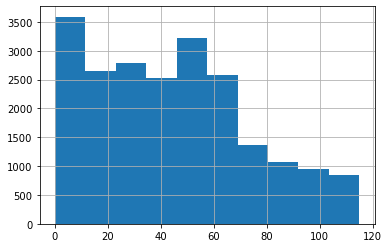

In [142]:
df.age.hist()
df['old_houses']=df['age']>20
df['new_houses']=df['age']<20
df.corr()

In [143]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,age,old_houses,new_houses
0,221900.0,1180,3,1.00,1.0,7,3,1,0.0,60,True,False
1,538000.0,2570,3,2.25,2.0,7,3,0,0.0,64,True,False
2,180000.0,770,2,1.00,1.0,6,3,1,0.0,82,True,False
3,604000.0,1960,4,3.00,1.0,7,5,1,0.0,50,True,False
4,510000.0,1680,3,2.00,1.0,8,3,1,0.0,28,True,False


In [144]:
df = df.drop(columns='new_houses', axis=1)

In [145]:
df.drop(df[df['old_houses'] == False].index, inplace=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15799 entries, 0 to 21567
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        15799 non-null  float64
 1   sqft_living  15799 non-null  int64  
 2   bedrooms     15799 non-null  int64  
 3   bathrooms    15799 non-null  float64
 4   floors       15799 non-null  float64
 5   grade        15799 non-null  int64  
 6   condition    15799 non-null  int64  
 7   renovated    15799 non-null  int32  
 8   waterfront   15799 non-null  float64
 9   age          15799 non-null  int64  
 10  old_houses   15799 non-null  bool   
dtypes: bool(1), float64(4), int32(1), int64(5)
memory usage: 1.3 MB


In [147]:
df['old_houses'] = df['old_houses'].astype('float64')

In [148]:
value_counts_bed=df['bedrooms'].value_counts()
to_remove = value_counts_bed[value_counts_bed <=50].index
df = df[~df.bedrooms.isin(to_remove)]

In [149]:
value_counts_bath=df['bathrooms'].value_counts()
to_remove_bath = value_counts_bath[value_counts_bath <=80].index
df = df[~df.bathrooms.isin(to_remove_bath)]

In [150]:
value_counts_floors=df['floors'].value_counts()
to_remove_floor = value_counts_floors[value_counts_floors <=10].index
df = df[~df.floors.isin(to_remove_floor)]

In [151]:
df.head()

,price,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,age,old_houses
0,221900.0,1180,3,1.00,1.0,7,3,1,0.0,60,1.0
1,538000.0,2570,3,2.25,2.0,7,3,0,0.0,64,1.0
2,180000.0,770,2,1.00,1.0,6,3,1,0.0,82,1.0
3,604000.0,1960,4,3.00,1.0,7,5,1,0.0,50,1.0
4,510000.0,1680,3,2.00,1.0,8,3,1,0.0,28,1.0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15456 entries, 0 to 21567
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        15456 non-null  float64
 1   sqft_living  15456 non-null  int64  
 2   bedrooms     15456 non-null  int64  
 3   bathrooms    15456 non-null  float64
 4   floors       15456 non-null  float64
 5   grade        15456 non-null  int64  
 6   condition    15456 non-null  int64  
 7   renovated    15456 non-null  int32  
 8   waterfront   15456 non-null  float64
 9   age          15456 non-null  int64  
 10  old_houses   15456 non-null  float64
dtypes: float64(5), int32(1), int64(5)
memory usage: 1.4 MB


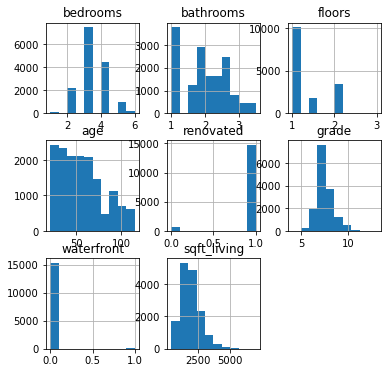

In [153]:
df[['bedrooms', 'bathrooms', 'floors', 'age','renovated','grade','waterfront','sqft_living']].hist(figsize  = [6, 6]); 

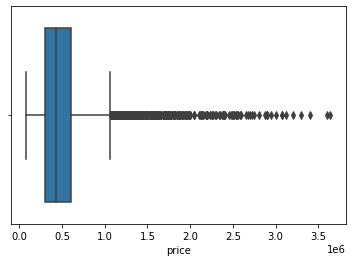

In [154]:
ax = sns.boxplot(x="price", data=df)

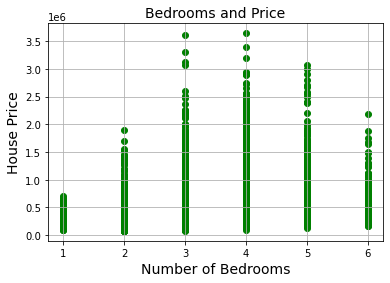

In [155]:
plt.scatter(df['bedrooms'], df['price'], color='green')
plt.title('Bedrooms and Price', fontsize=14)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

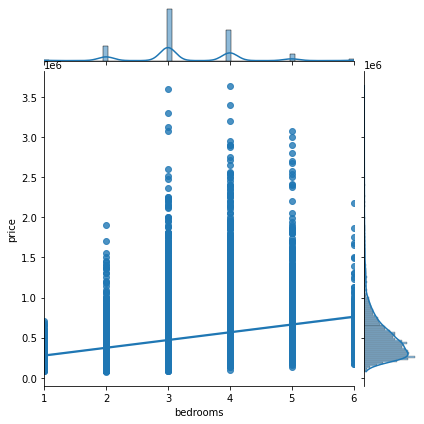

In [156]:
sns.jointplot(data=df, x="bedrooms", y="price", kind="reg")

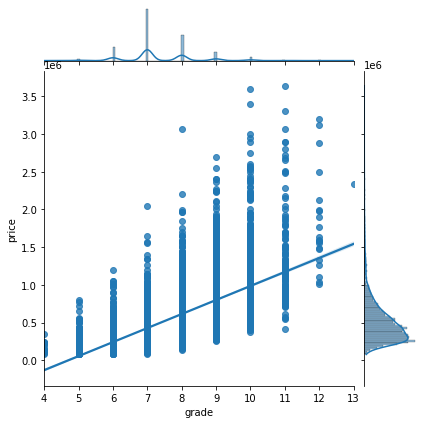

In [157]:
sns.jointplot(data=df, x="grade", y="price", kind="reg")

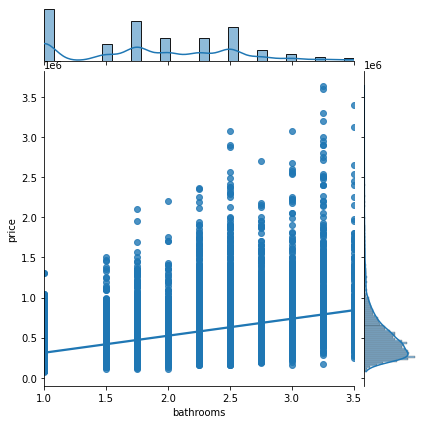

In [158]:
sns.jointplot(data=df, x="bathrooms", y="price", kind="reg")

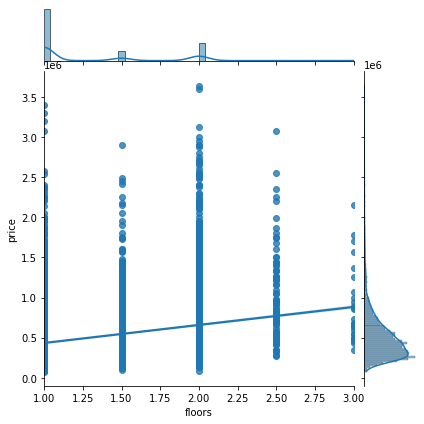

In [159]:
sns.jointplot(data=df, x="floors", y="price", kind="reg")

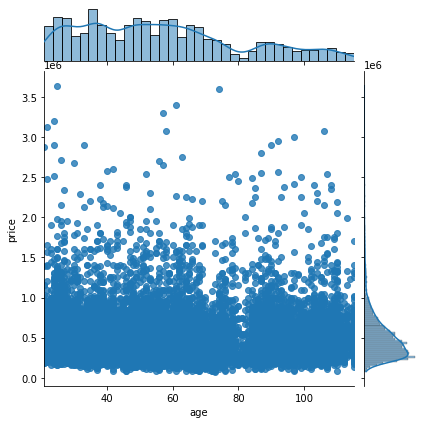

In [160]:
sns.jointplot(data=df, x="age", y="price", kind="reg")

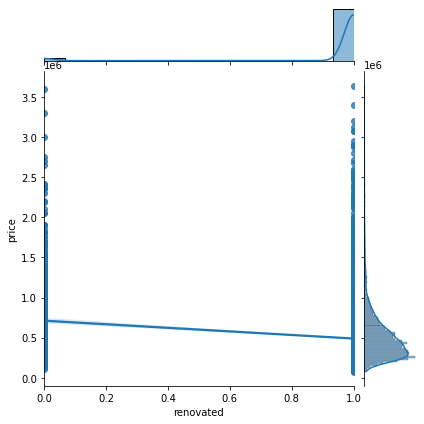

In [161]:
sns.jointplot(data=df, x="renovated", y="price", kind="reg")

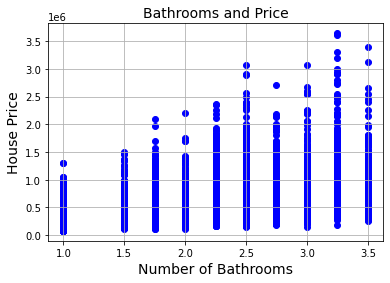

In [162]:
plt.scatter(df['bathrooms'], df['price'], color='blue')
plt.title('Bathrooms and Price', fontsize=14)
plt.xlabel('Number of Bathrooms', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

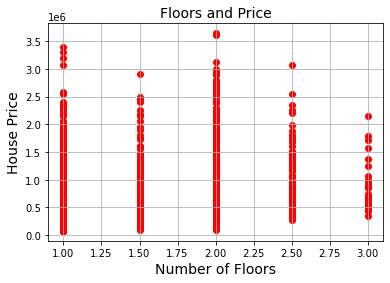

In [163]:
plt.scatter(df['floors'], df['price'], color='red')
plt.title('Floors and Price', fontsize=14)
plt.xlabel('Number of Floors', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

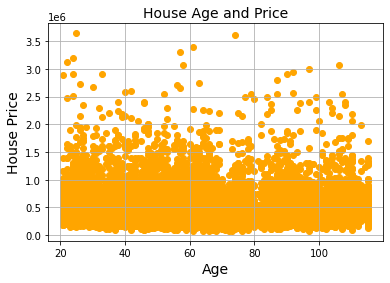

In [164]:
plt.scatter(df['age'], df['price'], color='orange')
plt.title('House Age and Price', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.ylabel('House Price', fontsize=14)
plt.grid(True)
plt.show()

## Model 1

In [165]:
def tts_model(df):
    y = df['price']
    X = df.drop(columns=['price'], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
    linreg = LinearRegression()
    model = linreg.fit(X_train, y_train)

    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    mse_train = mean_squared_error(y_train, train_predictions)
    mse_test = mean_squared_error(y_test, test_predictions)
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)

    print('Test RMSE:', np.sqrt(mse_test))
    print('Train RMSE:', np.sqrt(mse_train))
    print('Training Score:', round(train_score, 2))
    print('Test Score:', round(test_score, 2))
    print('Coefficients:', model.coef_)

    X_train = sm.add_constant(X_train)
    smmodel = sm.OLS(y_train, X_train).fit()
    print(smmodel.summary())
    return smmodel

In [166]:
model = tts_model(df)

Test RMSE: 189920.92739806848
Train RMSE: 184939.79320337996
Training Score: 0.62
Test Score: 0.61
Coefficients: [ 1.47934863e+02 -2.04954651e+04  1.97490048e+04 -9.38716255e+02
  1.35349238e+05  2.62096340e+04 -3.20218148e+04  6.15873215e+05
  4.08506620e+03  0.00000000e+00]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     2241.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:08:28   Log-Likelihood:            -1.6749e+05
No. Observations:               12364   AIC:                         3.350e+05
Df Residuals:                   12354   BIC:                         3.351e+05
Df Model:                           9                                         
Covariance T

<Figure size 864x576 with 0 Axes>

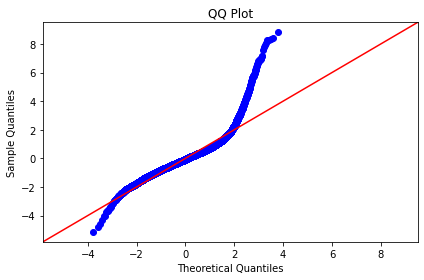

In [167]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.tight_layout()

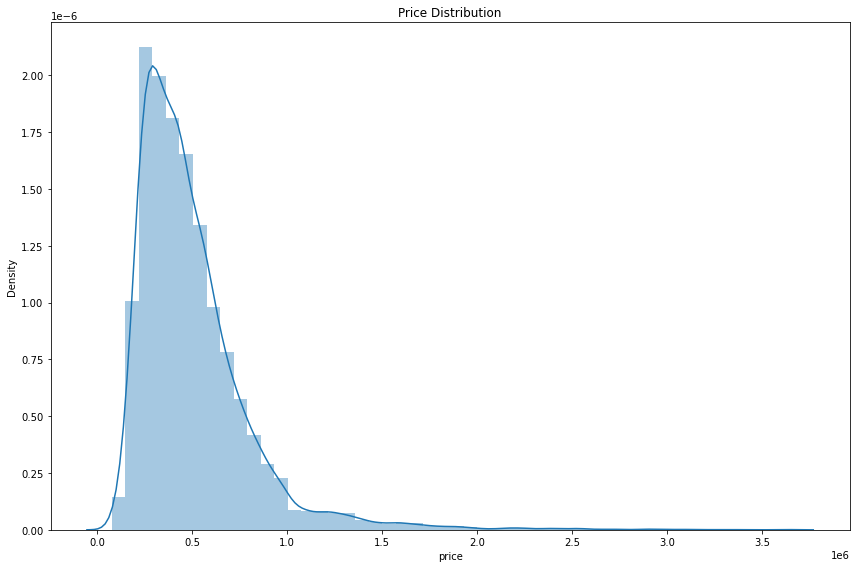

In [168]:
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.title('Price Distribution')
plt.tight_layout()

## Model 2 (Normalizing Price)

In [169]:
df = df[df['price'] <= 1000001]

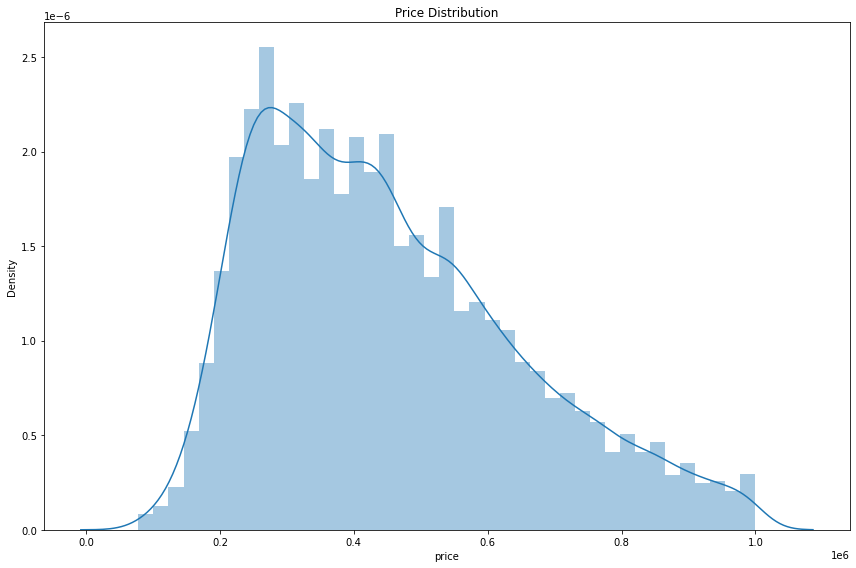

In [170]:
plt.figure(figsize=(12, 8))
sns.distplot(df.price)
plt.title('Price Distribution')
plt.tight_layout()

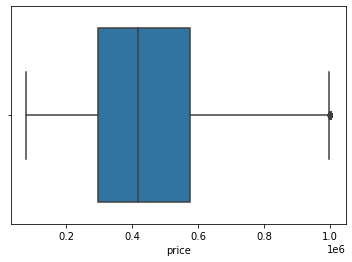

In [171]:
ax = sns.boxplot(x="price", data=df)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14706 entries, 0 to 21567
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        14706 non-null  float64
 1   sqft_living  14706 non-null  int64  
 2   bedrooms     14706 non-null  int64  
 3   bathrooms    14706 non-null  float64
 4   floors       14706 non-null  float64
 5   grade        14706 non-null  int64  
 6   condition    14706 non-null  int64  
 7   renovated    14706 non-null  int32  
 8   waterfront   14706 non-null  float64
 9   age          14706 non-null  int64  
 10  old_houses   14706 non-null  float64
dtypes: float64(5), int32(1), int64(5)
memory usage: 1.3 MB


In [173]:
model = tts_model(df)

Test RMSE: 134140.46565593692
Train RMSE: 133344.96356065274
Training Score: 0.53
Test Score: 0.53
Coefficients: [ 8.78188794e+01 -1.07964213e+04  3.12429680e+04  1.25845223e+04
  1.01190850e+05  1.77637777e+04  1.53711281e+03  1.50516982e+05
  3.19946879e+03  0.00000000e+00]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1486.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:08:29   Log-Likelihood:            -1.5552e+05
No. Observations:               11764   AIC:                         3.111e+05
Df Residuals:                   11754   BIC:                         3.111e+05
Df Model:                           9                                         
Covariance T

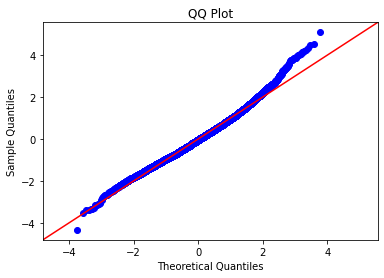

In [174]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

## Model 3 (Multicollinearity)

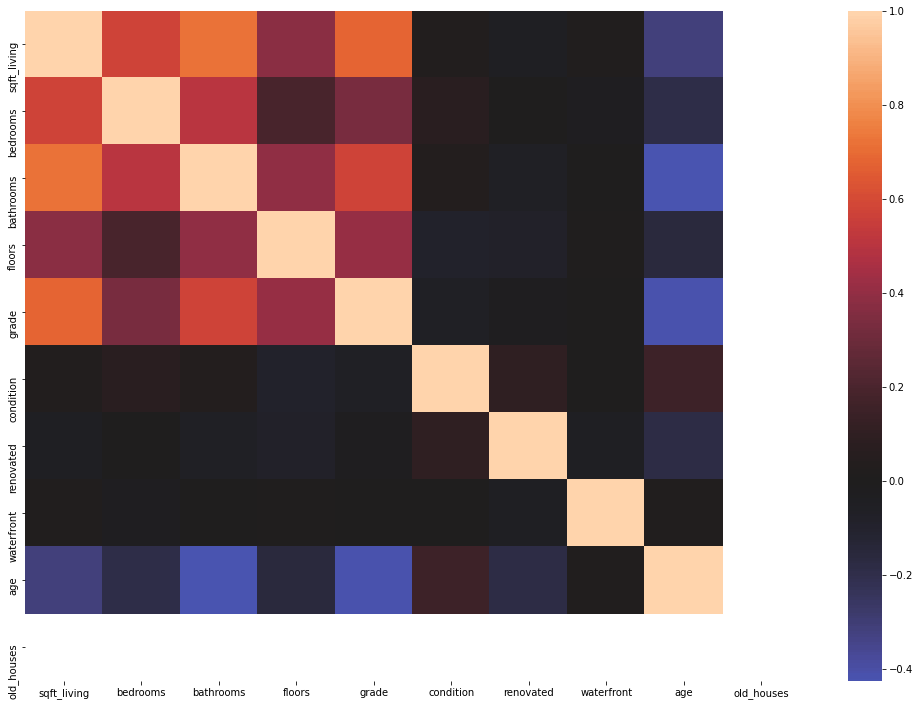

In [175]:
X = df.drop(columns=['price'], axis=1)
plt.figure(figsize=(14, 10))
sns.heatmap(X.corr(), center=0)
plt.tight_layout()
plt.show()

In [176]:
abs(X.corr()) >= .7

,sqft_living,bedrooms,bathrooms,floors,grade,condition,renovated,waterfront,age,old_houses
sqft_living,True,False,True,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False
bathrooms,True,False,True,False,False,False,False,False,False,False
floors,False,False,False,True,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,False,False
condition,False,False,False,False,False,True,False,False,False,False
renovated,False,False,False,False,False,False,True,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False
age,False,False,False,False,False,False,False,False,True,False
old_houses,False,False,False,False,False,False,False,False,False,False


In [177]:
corr_df = X.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# Zip the variable name columns in a  column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# Set index to pairs
corr_df.set_index(['pairs'], inplace = True)

# Drop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# Rename correlation column to cc
corr_df.columns = ['cc']

# Drop duplicates
corr_df.drop_duplicates(inplace=True)

In [178]:
corr_df[(corr_df.cc>.70) & (corr_df.cc <1)]

,cc
pairs,
"(sqft_living, bathrooms)",0.722617


In [179]:
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_dict = dict(zip(X.columns, vif))
vif_dict

{'sqft_living': 3.2252685880910827,
 'bedrooms': 1.57515679948633,
 'bathrooms': 2.525430719776594,
 'floors': 1.2823121298988354,
 'grade': 2.2165940131622808,
 'condition': 1.074901028050242,
 'renovated': 1.0859440217226035,
 'waterfront': 1.0038659437824426,
 'age': 1.439539746410177,
 'old_houses': 185.55281016331566}

In [180]:
tts_model(df)

Test RMSE: 134140.46565593692
Train RMSE: 133344.96356065274
Training Score: 0.53
Test Score: 0.53
Coefficients: [ 8.78188794e+01 -1.07964213e+04  3.12429680e+04  1.25845223e+04
  1.01190850e+05  1.77637777e+04  1.53711281e+03  1.50516982e+05
  3.19946879e+03  0.00000000e+00]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1486.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:08:30   Log-Likelihood:            -1.5552e+05
No. Observations:               11764   AIC:                         3.111e+05
Df Residuals:                   11754   BIC:                         3.111e+05
Df Model:                           9                                         
Covariance T

## Model 4 (Removing Insignificant Features)

In [181]:
df = df.drop(columns=['renovated'], axis=1)

In [182]:
tts_model(df)

Test RMSE: 134137.8764658786
Train RMSE: 133345.27618184555
Training Score: 0.53
Test Score: 0.53
Coefficients: [ 8.78267210e+01 -1.07819540e+04  3.11526370e+04  1.25558833e+04
  1.01181548e+05  1.78231536e+04  1.50445719e+05  3.19589300e+03
  0.00000000e+00]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1671.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:08:30   Log-Likelihood:            -1.5552e+05
No. Observations:               11764   AIC:                         3.110e+05
Df Residuals:                   11755   BIC:                         3.111e+05
Df Model:                           8                                         
Covariance Type:            n

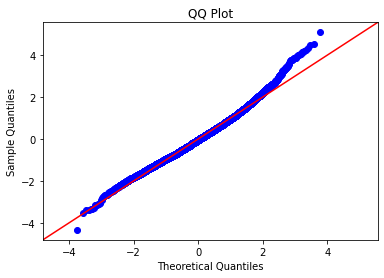

In [183]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.show()

## Model 5 Adjusting for Outliers

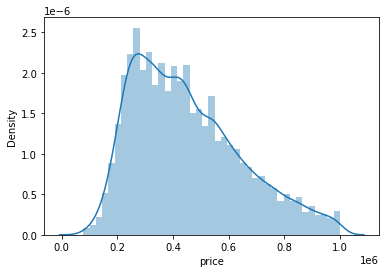

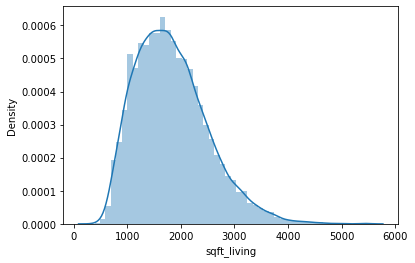

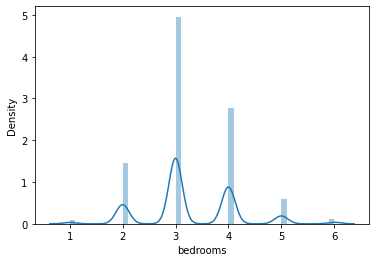

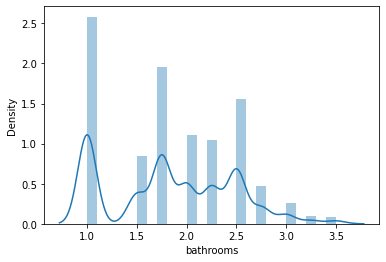

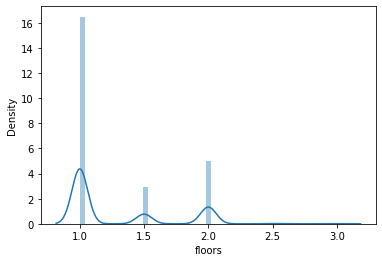

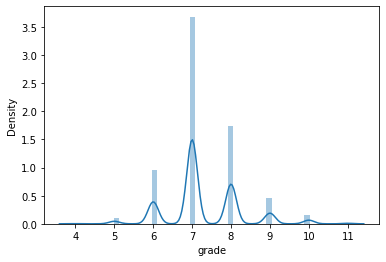

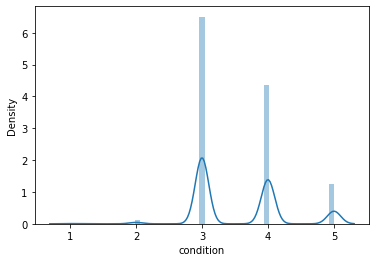

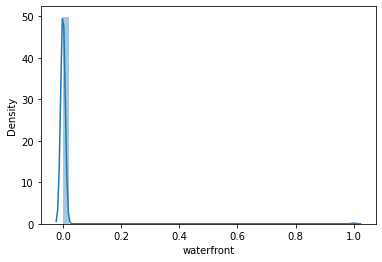

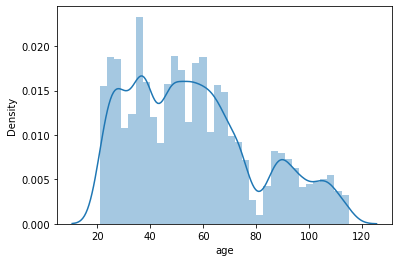

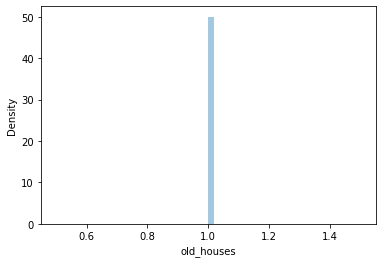

In [184]:
#View distribution plots for all columns
for col in df.columns:
    plt.subplots(1, 1)
    sns.distplot(df[col])

In [185]:
df = df[df['sqft_living'] < 5000]
df = df[df['bathrooms'] < 4.0]
df = df[df['floors'] < 3.5]

In [186]:
tts_model(df)

Test RMSE: 132748.03312526926
Train RMSE: 133594.0543251854
Training Score: 0.53
Test Score: 0.55
Coefficients: [ 9.09546124e+01 -1.25555023e+04  2.88696638e+04  1.27564328e+04
  9.99369144e+04  1.74703682e+04  1.51379308e+05  3.18752025e+03
  0.00000000e+00]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     1644.
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        13:08:32   Log-Likelihood:            -1.5547e+05
No. Observations:               11759   AIC:                         3.110e+05
Df Residuals:                   11750   BIC:                         3.110e+05
Df Model:                           8                                         
Covariance Type:            n

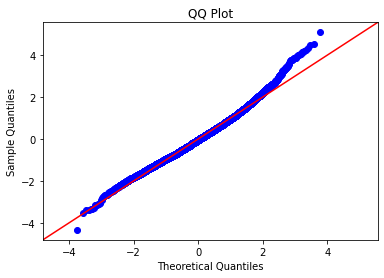

In [187]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
plt.title('QQ Plot')
plt.show()